In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib

### Spiral

In [396]:
df=pd.read_csv('Trace/Tracing Data/Old Data/Spiral_HandPD.csv')

In [397]:
df.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,68,0068-1.jpg,1,1,F,L,28,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2159.220559,4617.939790,34428.29401,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,68,0068-3.jpg,1,1,F,L,28,1740.390711,4260.973134,33632.95400,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2047.900847,4286.241318,32412.94476,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,92,0092-1.jpg,2,1,M,R,37,2059.220895,4733.016802,35437.08102,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


In [398]:
df.columns

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')

In [399]:
df=df.rename(columns={"CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT": "change", "MAX_BETWEEN_ET_HT": "MB",'MIN_BETWEEN_ET_HT':'MINB'})

In [400]:
df.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MB,MINB,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,change
0,68,0068-1.jpg,1,1,F,L,28,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2159.220559,4617.939790,34428.29401,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,68,0068-3.jpg,1,1,F,L,28,1740.390711,4260.973134,33632.95400,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2047.900847,4286.241318,32412.94476,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,92,0092-1.jpg,2,1,M,R,37,2059.220895,4733.016802,35437.08102,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


In [401]:
df=df[[ 'CLASS_TYPE', 'GENDER','RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MB', 'MINB', 'STD_DEVIATION_ET_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT', 'change']]

In [402]:
df.head()

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MB,MINB,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,change
0,1,F,L,28,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,1,F,L,28,2159.220559,4617.939790,34428.29401,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,1,F,L,28,1740.390711,4260.973134,33632.95400,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,1,F,L,28,2047.900847,4286.241318,32412.94476,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,1,M,R,37,2059.220895,4733.016802,35437.08102,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


## Input output split

In [403]:
X=df.loc[:, df.columns !='CLASS_TYPE']
X=X.loc[:, X.columns !='GENDER']
Y=df['CLASS_TYPE']
X.head()

,RIGH/LEFT-HANDED,AGE,RMS,MB,MINB,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,change
0,L,28,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,L,28,2159.220559,4617.939790,34428.29401,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,L,28,1740.390711,4260.973134,33632.95400,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,L,28,2047.900847,4286.241318,32412.94476,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,R,37,2059.220895,4733.016802,35437.08102,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


In [404]:
from collections import Counter
Counter(Y)

Counter({1: 72, 2: 296})

## Exploratory Data Analysis

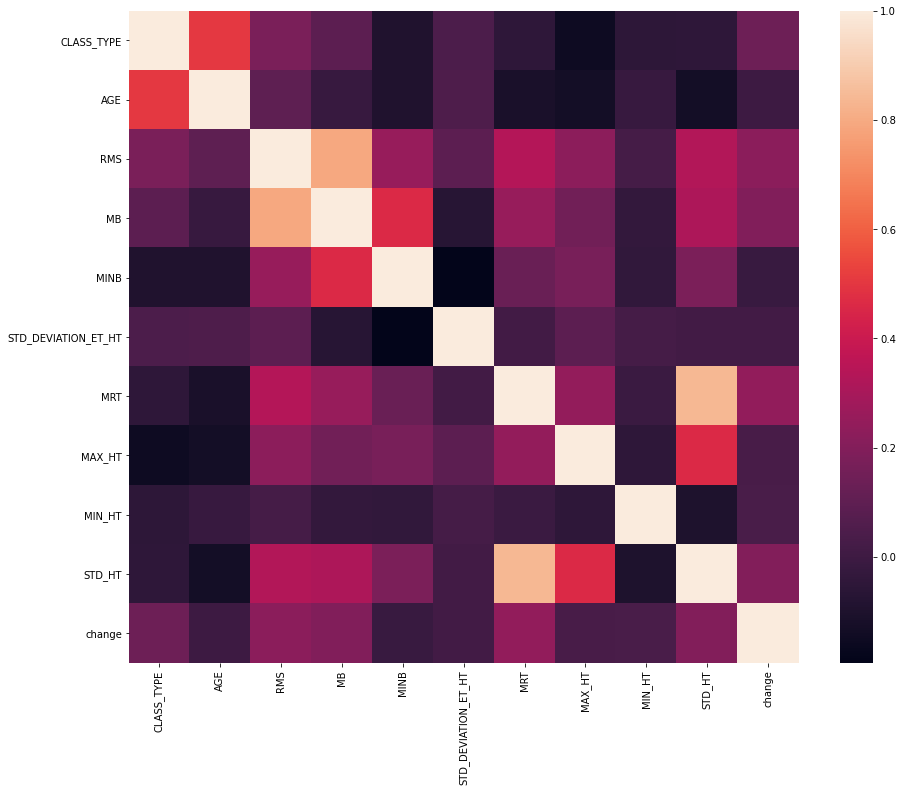

In [405]:
from matplotlib import pyplot as plt
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

#### No two features are very correlated, and thus all features are retained.

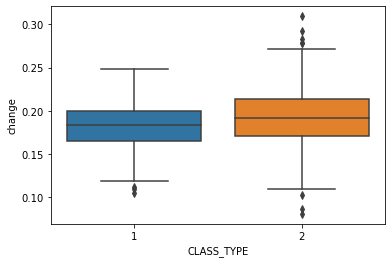

In [406]:
sns.boxplot(Y,df['change'])

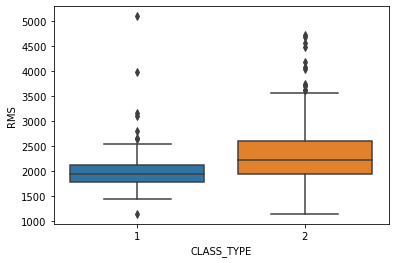

In [407]:
sns.boxplot(Y,df['RMS'])

In [408]:
g=df.groupby(['CLASS_TYPE','GENDER']).agg('count')
g

RIGH/LEFT-HANDED  AGE  RMS   MB  MINB  STD_DEVIATION_ET_HT  \
CLASS_TYPE GENDER                                                               
1          F                     48   48   48   48    48                   48   
           M                     24   24   24   24    24                   24   
2          F                     96   96   96   96    96                   96   
           M                    200  200  200  200   200                  200   

                   MRT  MAX_HT  MIN_HT  STD_HT  change  
CLASS_TYPE GENDER                                       
1          F        48      48      48      48      48  
           M        24      24      24      24      24  
2          F        96      96      96      96      96  
           M       200     200     200     200     200

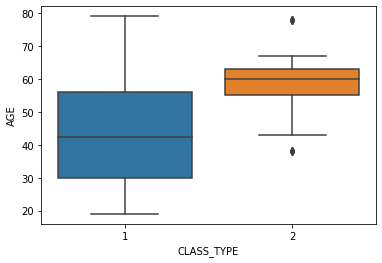

In [409]:
sns.boxplot(df['CLASS_TYPE'],df['AGE'])

### Label Encoding

In [410]:
#Converts all the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#X['GENDER']=le.fit_transform(X['GENDER'])
X['RIGH/LEFT-HANDED']=le.fit_transform(X['RIGH/LEFT-HANDED'])

In [411]:
X.head()

,RIGH/LEFT-HANDED,AGE,RMS,MB,MINB,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,change
0,0,28,2446.759108,5388.771096,33435.39545,0.0,26.849731,183.854351,0.017068,1779.550502,0.216138
1,0,28,2159.220559,4617.939790,34428.29401,0.0,26.758489,186.609895,0.000000,1885.340368,0.184438
2,0,28,1740.390711,4260.973134,33632.95400,0.0,30.973944,183.868389,0.006510,2197.159165,0.181287
3,0,28,2047.900847,4286.241318,32412.94476,0.0,28.165933,186.055214,0.025942,1875.711604,0.193084
4,1,37,2059.220895,4733.016802,35437.08102,0.0,22.091342,186.092103,0.000000,1625.325851,0.193642


In [412]:
from collections import Counter
Counter(Y)

Counter({1: 72, 2: 296})

## Feature importance

In [413]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)

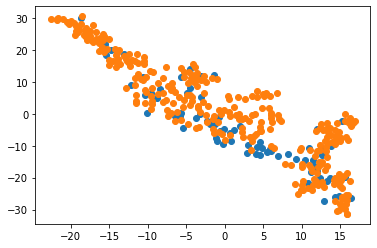

In [414]:
for i, t in enumerate(set(Y)):
    idx=Y==t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

No clear cluster found

### After Normalizing

In [421]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled)

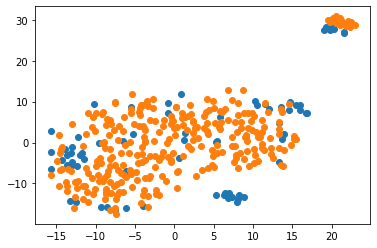

In [422]:
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
for i, t in enumerate(set(Y)):
    idx=Y==t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

### Feature importance with XGBoost

In [423]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X, Y)

print(model.feature_importances_*100)

[ 0.        30.510107   9.473268   4.7108765  7.62978   12.484209
  7.7799983  6.652523   9.658378   3.9968312  7.1040382]


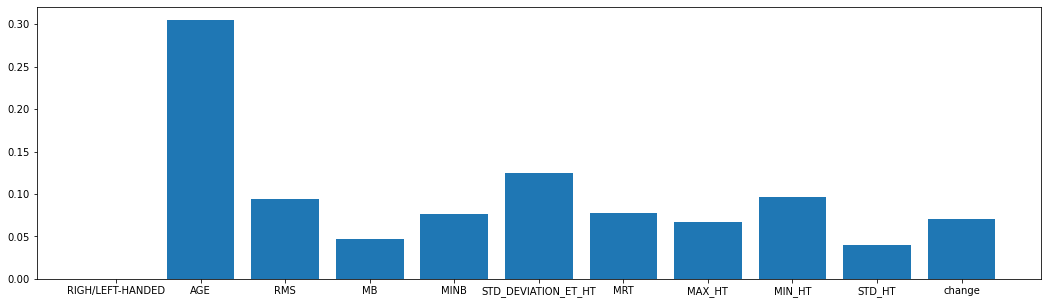

In [424]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 5))

pyplot.bar(X.columns, model.feature_importances_)
pyplot.show()

In [425]:
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.15,0.328852,0.530315,0.600385,0.0,0.511693,0.518611,0.149839,0.571771,0.592198
1,0.0,0.15,0.255964,0.357251,0.628223,0.0,0.506688,0.585253,0.000000,0.662216,0.453360
2,0.0,0.15,0.149796,0.277106,0.605924,0.0,0.737905,0.518950,0.057151,0.928803,0.439560
3,0.0,0.15,0.227746,0.282779,0.571718,0.0,0.583886,0.571838,0.227743,0.653984,0.491227
4,1.0,0.30,0.230616,0.383087,0.656507,0.0,0.250695,0.572730,0.000000,0.439918,0.493671


### Multiplying normalized value by importance

In [420]:
for i in range(len(X.columns)):
        X_norm[i]*=model.feature_importances_[i]*100

In [426]:
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.15,0.328852,0.530315,0.600385,0.0,0.511693,0.518611,0.149839,0.571771,0.592198
1,0.0,0.15,0.255964,0.357251,0.628223,0.0,0.506688,0.585253,0.000000,0.662216,0.453360
2,0.0,0.15,0.149796,0.277106,0.605924,0.0,0.737905,0.518950,0.057151,0.928803,0.439560
3,0.0,0.15,0.227746,0.282779,0.571718,0.0,0.583886,0.571838,0.227743,0.653984,0.491227
4,1.0,0.30,0.230616,0.383087,0.656507,0.0,0.250695,0.572730,0.000000,0.439918,0.493671


In [427]:
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
emb=pd.DataFrame(X_embedded)
emb.head()

,0,1
0,31.170597,-12.281446
1,30.591234,-12.453012
2,30.331722,-11.744240
3,30.132296,-12.515491
4,15.121355,-1.637420


In [428]:
emb['gender']=df['GENDER']
emb['label']=Y
emb.head()

,0,1,gender,label
0,31.170597,-12.281446,F,1
1,30.591234,-12.453012,F,1
2,30.331722,-11.744240,F,1
3,30.132296,-12.515491,F,1
4,15.121355,-1.637420,M,1


In [429]:
emb.groupby(['gender','label']).agg('count')

0    1
gender label          
F      1       48   48
       2       96   96
M      1       24   24
       2      200  200

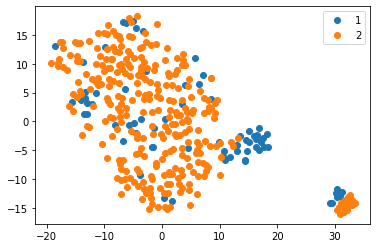

In [430]:
groups = emb.groupby(['label'])
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1], marker='.', linestyle='', ms=12, label=name)
ax.legend()

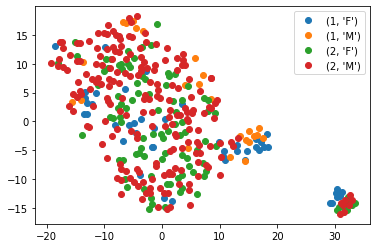

In [431]:
groups = emb.groupby(['label','gender'])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1], marker='.', linestyle='', ms=12, label=name)
ax.legend()

In [432]:
X_norm.groupby(0).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.150000,0.328852,0.530315,0.600385,0.0,0.511693,0.518611,0.149839,0.571771,0.592198
1,0.0,0.150000,0.255964,0.357251,0.628223,0.0,0.506688,0.585253,0.000000,0.662216,0.453360
2,0.0,0.150000,0.149796,0.277106,0.605924,0.0,0.737905,0.518950,0.057151,0.928803,0.439560
3,0.0,0.150000,0.227746,0.282779,0.571718,0.0,0.583886,0.571838,0.227743,0.653984,0.491227
4,1.0,0.300000,0.230616,0.383087,0.656507,0.0,0.250695,0.572730,0.000000,0.439918,0.493671
5,1.0,0.300000,0.207404,0.339358,0.606253,0.0,0.622938,0.249741,0.229086,0.640024,0.554335
6,1.0,0.300000,0.179475,0.455012,0.651739,0.0,0.403347,0.613562,0.000000,0.651330,0.329111
7,1.0,0.300000,0.114482,0.252324,0.574082,0.0,0.291472,0.222705,0.074779,0.241142,0.468352
8,1.0,0.766667,0.212513,0.314332,0.558994,0.0,0.369315,0.326257,0.027908,0.354146,0.664113
24,0.0,0.250000,0.211902,0.265698,0.466031,0.0,0.511337,0.558780,0.129296,0.624170,0.465983


#### Better clusters observed

### Train Test split

In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm, Y, test_size=0.3, random_state=42)

# Classification

## Random Forest Classifier

In [270]:
#Create a random forest classifier and train model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=5,class_weight={1:1,2:1.4})
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={1: 1, 2: 1.4}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

### Train Accuracy

In [271]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[ 49   0]
 [  0 208]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00       208

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

1.0


### Test Accuracy

In [272]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[18  5]
 [ 1 87]]
              precision    recall  f1-score   support

           1       0.95      0.78      0.86        23
           2       0.95      0.99      0.97        88

    accuracy                           0.95       111
   macro avg       0.95      0.89      0.91       111
weighted avg       0.95      0.95      0.94       111

0.9459459459459459


## Naive Bayes

In [276]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train1, y_train1)

GaussianNB(priors=None, var_smoothing=1e-09)

### Train Accuracy

In [278]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_train1)
print(confusion_matrix(y_train1,y_pred))
print(classification_report(y_train1,y_pred))
print(accuracy_score(y_train1, y_pred))

[[ 44   5]
 [113  95]]
              precision    recall  f1-score   support

           1       0.28      0.90      0.43        49
           2       0.95      0.46      0.62       208

    accuracy                           0.54       257
   macro avg       0.62      0.68      0.52       257
weighted avg       0.82      0.54      0.58       257

0.5408560311284046


### Test Accuracy

In [279]:
y_pred = clf.predict(X_test1)
print(confusion_matrix(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(accuracy_score(y_test1, y_pred))

[[23  0]
 [47 41]]
              precision    recall  f1-score   support

           1       0.33      1.00      0.49        23
           2       1.00      0.47      0.64        88

    accuracy                           0.58       111
   macro avg       0.66      0.73      0.57       111
weighted avg       0.86      0.58      0.61       111

0.5765765765765766


## SVM

In [293]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Training Accuracy

In [294]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_train1)
print(confusion_matrix(y_train1,y_pred))
print(classification_report(y_train1,y_pred))
print(accuracy_score(y_train1, y_pred))

[[ 17  32]
 [  0 208]]
              precision    recall  f1-score   support

           1       1.00      0.35      0.52        49
           2       0.87      1.00      0.93       208

    accuracy                           0.88       257
   macro avg       0.93      0.67      0.72       257
weighted avg       0.89      0.88      0.85       257

0.8754863813229572


### Testing Accuracy

In [295]:
y_pred = clf.predict(X_test1)
print(confusion_matrix(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(accuracy_score(y_test1, y_pred))

[[10 13]
 [ 0 88]]
              precision    recall  f1-score   support

           1       1.00      0.43      0.61        23
           2       0.87      1.00      0.93        88

    accuracy                           0.88       111
   macro avg       0.94      0.72      0.77       111
weighted avg       0.90      0.88      0.86       111

0.8828828828828829


## XGBoost

In [283]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [284]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[ 48   1]
 [  0 208]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        49
           2       1.00      1.00      1.00       208

    accuracy                           1.00       257
   macro avg       1.00      0.99      0.99       257
weighted avg       1.00      1.00      1.00       257

0.9961089494163424


In [285]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[13 10]
 [ 3 85]]
              precision    recall  f1-score   support

           1       0.81      0.57      0.67        23
           2       0.89      0.97      0.93        88

    accuracy                           0.88       111
   macro avg       0.85      0.77      0.80       111
weighted avg       0.88      0.88      0.87       111

0.8828828828828829


# Meander

In [458]:
df=pd.read_csv('Trace/Tracing Data/Old Data/Meander_HandPD.csv')

In [459]:
df.columns

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ST_HT',
       'MIN_BETWEEN_ST_HT', 'STD_DEVIATION_ST_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT'],
      dtype='object')

In [460]:
df=df.rename(columns={"CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ST_HT": "change", "MAX_BETWEEN_ST_HT": "MB",'MIN_BETWEEN_ST_HT':'MINB'})

In [461]:
df.head()

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MB,MINB,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,change
0,68,0068-1.jpg,1,1,F,L,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,68,0068-2.jpg,1,1,F,L,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,68,0068-3.jpg,1,1,F,L,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,68,0068-4.jpg,1,1,F,L,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,92,0092-1.jpg,2,1,M,R,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


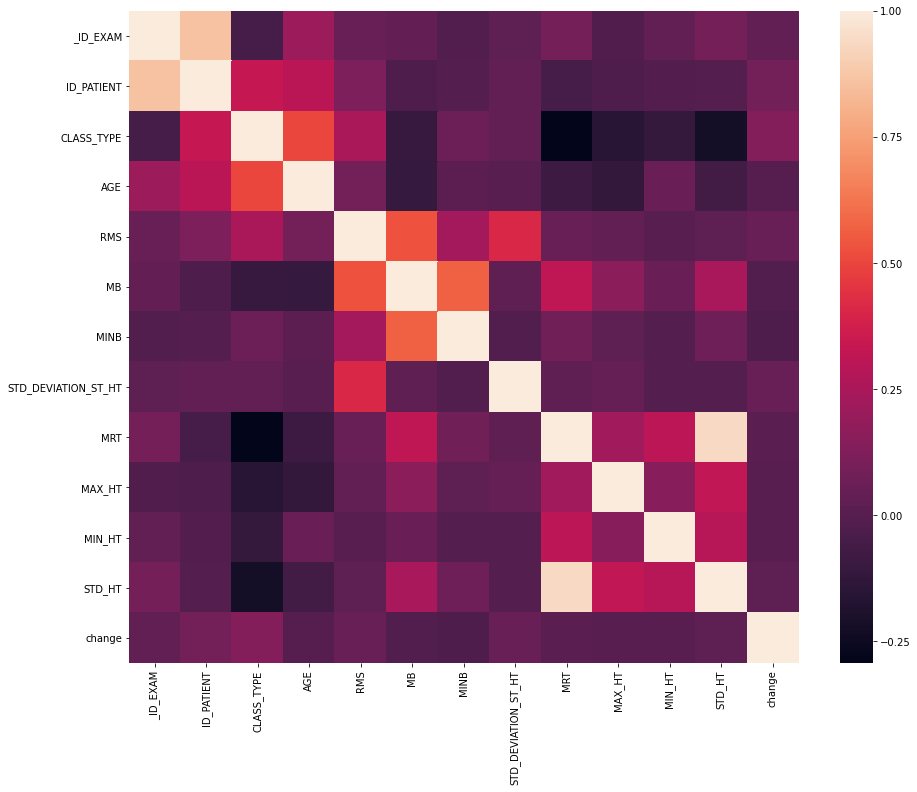

In [462]:
from matplotlib import pyplot as plt
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [463]:
df=df[[ 'CLASS_TYPE', 'GENDER','RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MB', 'MINB', 'STD_DEVIATION_ST_HT',
       'MRT', 'MAX_HT', 'MIN_HT', 'STD_HT', 'change']]

In [464]:
df.head()

,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MB,MINB,STD_DEVIATION_ST_HT,MRT,MAX_HT,MIN_HT,STD_HT,change
0,1,F,L,28,3176.216064,7098.378906,46569.03516,0.000672,21.280848,224.197754,0.156795,802.821106,0.216138
1,1,F,L,28,2751.015869,6263.803711,44059.59766,0.000000,22.056967,212.937836,0.009198,939.975647,0.184438
2,1,F,L,28,3050.623779,6548.623047,40298.10938,0.000026,22.451719,223.401764,0.000000,997.580139,0.181287
3,1,F,L,28,2594.598877,6989.159180,54217.63281,0.000000,30.559263,233.222504,0.367697,2060.858887,0.193084
4,1,M,R,37,3310.786865,6060.232422,35212.75781,0.000667,18.138407,196.811325,0.073079,562.886475,0.193642


In [465]:
#Converts all the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['RIGH/LEFT-HANDED']=le.fit_transform(df['RIGH/LEFT-HANDED'])

In [466]:
Y=df['CLASS_TYPE']
X=df.loc[:, df.columns !='CLASS_TYPE']
X=X.loc[:, X.columns !='GENDER']

In [467]:
from sklearn.manifold import TSNE

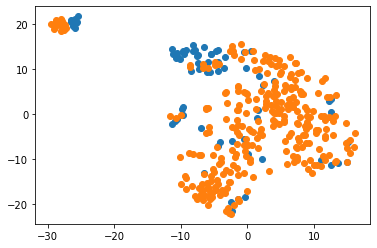

In [468]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(x_scaled)
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
for i, t in enumerate(set(Y)):
    idx=Y==t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

[ 0.        32.57578   12.431037   7.724388   6.588422   7.581172
  6.6416836  6.5702567  4.195664   8.294625   7.396966 ]


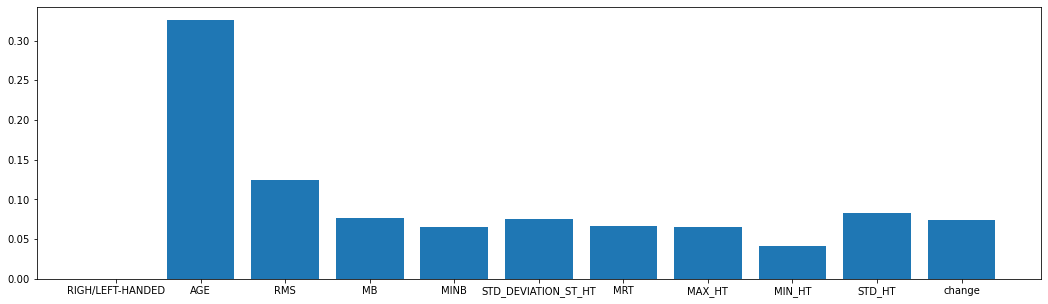

In [469]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X, Y)

print(model.feature_importances_*100)
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 5))

pyplot.bar(X.columns, model.feature_importances_)
pyplot.show()

In [470]:
X_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.150000,0.136865,0.522924,0.398259,4.894144e-06,0.142573,0.921034,0.212375,0.154316,0.592198
1,0.0,0.150000,0.099820,0.414264,0.362705,0.000000e+00,0.166307,0.829914,0.012458,0.204595,0.453360
2,0.0,0.150000,0.125923,0.451347,0.309411,1.893568e-07,0.178379,0.914593,0.000000,0.225711,0.439560
3,0.0,0.150000,0.086193,0.508704,0.506626,0.000000e+00,0.426314,0.994067,0.498037,0.615489,0.491227
4,1.0,0.300000,0.148589,0.387760,0.237361,4.857729e-06,0.046475,0.699412,0.098984,0.066361,0.493671
...,...,...,...,...,...,...,...,...,...,...,...
363,1.0,0.483333,0.297076,0.508493,0.462462,8.979880e-06,0.101930,0.844236,0.259395,0.117565,0.645569
364,1.0,0.483333,0.246778,0.281166,0.202204,5.914573e-03,0.157199,0.812809,0.132324,0.106982,0.705392
365,1.0,0.483333,0.262817,0.377116,0.259055,2.173524e-04,0.006548,0.496932,0.013682,0.055635,0.531946
366,1.0,0.483333,0.251207,0.632742,0.739692,6.886759e-05,0.117877,0.470616,0.117604,0.128702,0.652257


In [471]:
#for i in range(len(X.columns)):
#        X_norm[i]*=model.feature_importances_[i]*100
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
emb=pd.DataFrame(X_embedded)
emb['gender']=df['GENDER']
emb['label']=Y

emb.head()

,0,1,gender,label
0,26.964138,17.714367,0,1
1,26.432714,16.999216,0,1
2,26.437553,17.105803,0,1
3,26.455582,18.508146,0,1
4,4.126998,12.695160,1,1


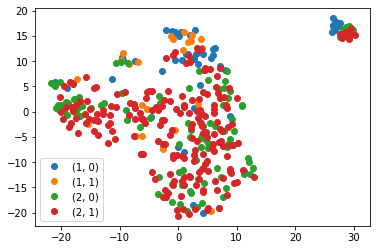

In [472]:
groups = emb.groupby(['label','gender'])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group[0], group[1], marker='.', linestyle='', ms=12, label=name)
ax.legend()

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm, Y, test_size=0.3, random_state=42)

## RF

In [478]:
classifier = RandomForestClassifier(n_estimators=50, random_state=5,class_weight={1:1,2:4})
classifier.fit(X_train, y_train)

ValueError: Class label 2 not present.

In [369]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[ 49   0]
 [  0 208]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00       208

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

1.0


In [371]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[18  5]
 [ 2 86]]
              precision    recall  f1-score   support

           1       0.90      0.78      0.84        23
           2       0.95      0.98      0.96        88

    accuracy                           0.94       111
   macro avg       0.92      0.88      0.90       111
weighted avg       0.94      0.94      0.94       111

0.9369369369369369


## XGBoost

In [372]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [373]:
y_pred = model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[ 48   1]
 [  0 208]]
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        49
           2       1.00      1.00      1.00       208

    accuracy                           1.00       257
   macro avg       1.00      0.99      0.99       257
weighted avg       1.00      1.00      1.00       257

0.9961089494163424


In [375]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[19  4]
 [ 1 87]]
              precision    recall  f1-score   support

           1       0.95      0.83      0.88        23
           2       0.96      0.99      0.97        88

    accuracy                           0.95       111
   macro avg       0.95      0.91      0.93       111
weighted avg       0.95      0.95      0.95       111

0.954954954954955


## SVM

In [384]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [385]:
y_pred = clf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[ 30  19]
 [ 11 197]]
              precision    recall  f1-score   support

           1       0.73      0.61      0.67        49
           2       0.91      0.95      0.93       208

    accuracy                           0.88       257
   macro avg       0.82      0.78      0.80       257
weighted avg       0.88      0.88      0.88       257

0.8832684824902723


In [386]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[19  4]
 [ 6 82]]
              precision    recall  f1-score   support

           1       0.76      0.83      0.79        23
           2       0.95      0.93      0.94        88

    accuracy                           0.91       111
   macro avg       0.86      0.88      0.87       111
weighted avg       0.91      0.91      0.91       111

0.9099099099099099


### with normalization

In [311]:
clf.fit(X_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [312]:
y_pred = clf.predict(X_train1)
print(confusion_matrix(y_train1,y_pred))
print(classification_report(y_train1,y_pred))
print(accuracy_score(y_train1, y_pred))

[[81 18]
 [ 6 79]]
              precision    recall  f1-score   support

           1       0.93      0.82      0.87        99
           2       0.81      0.93      0.87        85

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184

0.8695652173913043


In [313]:
y_pred = clf.predict(X_test1)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test1,y_pred))
print(classification_report(y_test1,y_pred))
print(accuracy_score(y_test1, y_pred))

[[28 13]
 [ 2 37]]
              precision    recall  f1-score   support

           1       0.93      0.68      0.79        41
           2       0.74      0.95      0.83        39

    accuracy                           0.81        80
   macro avg       0.84      0.82      0.81        80
weighted avg       0.84      0.81      0.81        80

0.8125


### Neural network

In [474]:
Y[Y==1]=0
Y[Y==2]=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [481]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.framework import ops
ops.reset_default_graph()

model = tf.keras.Sequential()
model.add(layers.Dense(8, input_dim=11, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [482]:
Counter(y_train)

Counter({1: 208, 0: 49})

In [483]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train1, y_train1, epochs=50, batch_size=16,class_weight={0:1,1:3})


Epoch 1/50
17/17 [==============================] - 0s 657us/step - loss: 1.4778 - accuracy: 0.8093
Epoch 2/50
17/17 [==============================] - 0s 645us/step - loss: 1.2892 - accuracy: 0.8093
Epoch 3/50
17/17 [==============================] - 0s 587us/step - loss: 1.0801 - accuracy: 0.8093
Epoch 4/50
17/17 [==============================] - 0s 530us/step - loss: 0.8921 - accuracy: 0.8093
Epoch 5/50
17/17 [==============================] - 0s 634us/step - loss: 0.7672 - accuracy: 0.8093
Epoch 6/50
17/17 [==============================] - 0s 613us/step - loss: 0.7047 - accuracy: 0.8093
Epoch 7/50
17/17 [==============================] - 0s 560us/step - loss: 0.6833 - accuracy: 0.8093
Epoch 8/50
17/17 [==============================] - 0s 806us/step - loss: 0.6748 - accuracy: 0.8093
Epoch 9/50
17/17 [==============================] - 0s 880us/step - loss: 0.6699 - accuracy: 0.8093
Epoch 10/50
17/17 [==============================] - 0s 891us/step - loss: 0.6653 - accuracy: 0.8093

In [484]:
y_pred = model.predict(X_train)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[  0  49]
 [  0 208]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.81      1.00      0.89       208

    accuracy                           0.81       257
   macro avg       0.40      0.50      0.45       257
weighted avg       0.66      0.81      0.72       257

0.8093385214007782


C:\Users\aumkar\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aumkar\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aumkar\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [485]:
y_pred = model.predict(X_test)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0 23]
 [ 0 88]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.79      1.00      0.88        88

    accuracy                           0.79       111
   macro avg       0.40      0.50      0.44       111
weighted avg       0.63      0.79      0.70       111

0.7927927927927928


C:\Users\aumkar\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aumkar\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aumkar\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)